<a href="https://colab.research.google.com/github/mayaah-karolaine/tt3-orf-extractor/blob/main/MpGenomaSARScOV10_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAPA GENOMA SARS CoV-2.PY



In [ ]:
with open("/content/sample_data/VIROblas1.txt", "r") as file1:
    FileContent = file1.read()
    print(FileContent)

In [ ]:
# Quero identinficar o query como o id do primer
idPrimer = "Query="
idSeq = ">"
position= "Sbjct"

with open("/content/sample_data/VIROblas1.txt", "r") as file1:
  for line in file1:
    if idPrimer in line:
      print(line)
    elif idSeq in line:
      print(line[:52])
    elif position in line:
      print(line [5:13], line[-7:])

In [ ]:
idPrimer = "Query="
idSeq = ">"
position= "Sbjct"

with open("/content/sample_data/VIROblas2.txt", "r") as file2:
  for line in file2:
    if idPrimer in line:
      print(line)
    elif idSeq in line:
      print(line[:52])
    elif position in line:
      print(line [5:13], line[-7:])

In [ ]:
idPrimer = "Query="
idSeq = ">"
position= "Sbjct"

with open("/content/sample_data/VIROblas3.txt", "r") as file3:
  for line in file3:
    if idPrimer in line:
      print(line)
    elif idSeq in line:
      print(line[:52])
    elif position in line:
      print(line [5:13], line[-7:])

In [ ]:
tipo ="RIGHT"
idPrimer = "Query="
idSeq = ">"
position= "Sbjct"

with open("/content/sample_data/Viroblas4.txt", "r") as file4:
  for line in file4:
    if idPrimer in line:
      print(line)
    elif idSeq in line:
      print(line[:52])
    elif position in line:
      print(line [5:13], line[-7:])

In [ ]:
import pandas as pd
orientation= None
nome_primer= None
primer= None
idPrimer="Query="
idSeq=">"
position="Sbjct"

arquivos = ['Ver2_ViroBlas01.txt','Ver2_Viroblas02.txt', 'Ver2_Viroblas03.txt', 'Ver_Viroblas04.txt']

df = pd.DataFrame()

for file in arquivos:
    with open(f'/content/sample_data/{arquivos}','r') as file1:
        for line in file1:
            primer_position=[]
            if idPrimer in line:
               orientation = line.replace('\n', '').split('_')[2]
               pool= line.split('_')[1]
            if orientation != 'RIGHT':
               continue
            if idSeq in line:
               genoma_ref=line[5:15]
               nome_primer=line[41:52]
            elif position in line:
                for caractere in line.replace('\n', '').split(' '):
                    if caractere.isnumeric():
                       primer_position.append(caractere)
                d={
               'genoma_ref':[nome_primer],
               'nome_primer':[orientation],
               'End':[primer_position[0]],
               'Start':[primer_position[1]],
               'primer':[pool]
               }
                temp_df = pd.DataFrame(data=d)
                df=pd.concat([df,temp_df])
df.to_csv('outRIGHT.csv',index=False)

In [ ]:
 import pandas as pd
orientation= None
nome_primer= None
primer= None
idPrimer="Query="
idSeq=">"
position="Sbjct"

arquivos = ['Ver2_ViroBlas01.txt','Ver2_Viroblas02.txt', 'Ver2_Viroblas03.txt', 'Ver_Viroblas04.txt']

df = pd.DataFrame()

for file in arquivos:
    with open(f'/content/sample_data/Ver2_ViroBlas01.txt{file}','r') as file1:
        for line in file1:
            primer_position=[]
            if idPrimer in line:
               orientation = line.replace('\n', '').split('_')[2]
               pool= line.split('_')[1]
            if orientation != 'LEFT':
               continue
            if idSeq in line:
               genoma_ref=line[5:15]
               nome_primer=line[41:52]
            elif position in line:
                for caractere in line.replace('\n', '').split(' '):
                    if caractere.isnumeric():
                       primer_position.append(caractere)
                d={
               'genoma_ref':[nome_primer],
               'nome_primer':[orientation],
               'End':[primer_position[0]],
               'Start':[primer_position[1]],
               'primer':[pool]
               }
                temp_df = pd.DataFrame(data=d)
                df=pd.concat([df,temp_df])
df.to_csv('outLEFT.csv',index=False)

In [ ]:
import pandas as pd

lista = pd.read_csv('/content/sample_data/outRIGHT_teste.csv')


In [ ]:
df = 'outRight.count'

df_group_genoma = lista.groupby(['genoma_ref', 'primer']).count().reset_index()[['genoma_ref', 'primer', 'nome_primer' ]]
df_group_genoma = df_group_genoma.rename(columns={'nome_primer': 'count'})
df_group_primer = df_group_genoma.groupby(['genoma_ref']).count().reset_index().rename(columns={'primer': 'primer_count'})[['genoma_ref', 'primer_count']]
df_group_primer[df_group_primer['primer_count'] >= 94]

# df_group.to_csv('outRight.count.csv',index=False)

df_group_genoma[df_group_genoma['genoma_ref'] == 'ON062195.1 ']['primer'].values

*Inicio da criação do mapa*

In [ ]:
  %pip install bioframe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 3.1 MB/s eta 0:00:00


# MAPA  COM AS COORDENADAS DO GENOMA SARS CoV-2

In [ ]:
#importando blibliotecas para utilizar as funções.
import pandas as pd
import json
import matplotlib.pyplot as plt


In [ ]:
#Filtrando dataset e add uma nova coluna com informação extra.
import pandas as pd

sars = {'orf_s': ['1A','1AB','SPIKE','3A', '4', '5', '6', '7A','7B', '8', '9','10'],
        'Start' : [266, 13483, 21563, 25393, 26245, 26523, 27202, 27394, 27756, 27894, 28281, 29565],
        'End' : [13483, 21555, 25384, 26220, 26472, 27191, 27387, 27759, 27887, 28262, 29540, 29681]
        }
df = pd.DataFrame.from_dict(sars)
df['length'] = df['End'] - df['Start']
print(df)

    orf_s  Start    End  length
0      1A    266  13483   13217
1     1AB  13483  21555    8072
2   SPIKE  21563  25384    3821
3      3A  25393  26220     827
4       4  26245  26472     227
5       5  26523  27191     668
6       6  27202  27387     185
7      7A  27394  27759     365
8      7B  27756  27887     131
9       8  27894  28262     368
10      9  28281  29540    1259
11     10  29565  29681     116


In [ ]:
# Chamando o arquivo contendo todos os genomas ref que alinharam com os primers
import pandas as pd
df = pd.read_csv('/content/sample_data/out_all.csv')
print(df)
df = df[df['genoma_ref'] == 'ON874956.1 '].drop_duplicates(subset=['nome_primer', 'primer'])

df.to_csv('out_all_filtered.csv', index=False)


In [ ]:
#criando um csv vazio e nomeando de ORFsars.csv
import csv
f = open("Orfsars.csv", "x")

In [ ]:
#Add e writing um dataframe com as coordenadas das ORFs presente no genoma de SARS-CoV-2
import pandas as pd

categorias = ['Name', 'Inicio', 'Fim', 'Length']

# Info nas linhas (rows) do arquivo csv
rows = [['ORF1a', '266', '13483', '13217'],
        ['ORF1ab', '13483', '21555', '8072'],
        ['SPIKE', '21563' , '25384', '3821'],
        ['ORF3a', '25393', '26220', ' 827'],
        ['ORF4', '26245', '26472', '227'],
        ['ORF 5', '26523', '27191', '668'],
        ['ORF 6', '27202', '27387', '185'],
        ['ORF 7a', '27394', '27759', '365'],
        ['ORF 7b', '27756', '27887', '131'],
        ['ORF 8', '27894', '28262', '368'],
        ['ORF 9', '28281', '29540', '1259'],
        ['ORF 10', '29565', '29681', '116']]

df = pd.DataFrame(rows, columns = categorias)
df.to_csv('Orfsars.csv', index=False)



# Criação do mapa

In [ ]:
# Abrindo arquivos altualizados csv e
import pandas as pd

df = pd.read_csv('Orfsars.csv')
df_primer = pd.read_csv('out_all_filtered.csv')

df_primer['start_end'] = df_primer.apply(lambda row: f"{str(row['Start'])} - {str(row['End'])}", axis=1)
df_primer_right = df_primer[(df_primer['nome_primer'] == 'RIGHT') & (df_primer['genoma_ref'] == 'ON874956.1 ')]
df_primer_left = df_primer[(df_primer['nome_primer'] == 'LEFT')  & (df_primer['genoma_ref'] == 'ON874956.1 ')]

df_primer


,genoma_ref,nome_primer,End,Start,primer,start_end
0,ON874956.1,RIGHT,360,336,1,336 - 360
1,ON874956.1,LEFT,271,292,2,292 - 271
2,ON874956.1,RIGHT,667,646,2,646 - 667
3,ON874956.1,LEFT,593,614,3,614 - 593
4,ON874956.1,RIGHT,969,946,3,946 - 969
...,...,...,...,...,...,...
180,ON874956.1,RIGHT,28971,28950,95,28950 - 28971
181,ON874956.1,LEFT,28894,28915,96,28915 - 28894
182,ON874956.1,RIGHT,29286,29265,96,29265 - 29286
183,ON874956.1,LEFT,29197,29224,97,29224 - 29197


In [ ]:
df_primer_left[df_primer_left['primer'] == 50]

,genoma_ref,nome_primer,End,Start,primer,start_end
95,ON874956.1,LEFT,14798,14827,50,14827 - 14798


In [ ]:
df_join = df_primer_right\
  .drop_duplicates(subset=['nome_primer', 'primer'])\
  .merge(
      df_primer_left\
       .drop_duplicates(subset=['nome_primer', 'primer'])\
       .rename(columns={'Start': 'l_Start', 'End': 'l_End'})[['primer', 'l_Start', 'l_End']],
      on='primer', how='outer')

In [ ]:
df_join.dropna()

,genoma_ref,nome_primer,End,Start,primer,start_end,l_Start,l_End
1,ON874956.1,RIGHT,667.0,646.0,2,646 - 667,292.0,271.0
2,ON874956.1,RIGHT,969.0,946.0,3,946 - 969,614.0,593.0
3,ON874956.1,RIGHT,1278.0,1254.0,4,1254 - 1278,906.0,885.0
4,ON874956.1,RIGHT,1592.0,1565.0,5,1565 - 1592,1205.0,1184.0
5,ON874956.1,RIGHT,1905.0,1884.0,6,1884 - 1905,1536.0,1515.0
...,...,...,...,...,...,...,...,...
89,ON874956.1,RIGHT,28372.0,28351.0,93,28351 - 28372,28021.0,27999.0
90,ON874956.1,RIGHT,28687.0,28665.0,94,28665 - 28687,28324.0,28303.0
91,ON874956.1,RIGHT,28971.0,28950.0,95,28950 - 28971,28607.0,28586.0
92,ON874956.1,RIGHT,29286.0,29265.0,96,29265 - 29286,28915.0,28894.0


In [ ]:
colors = (['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'brown'] * 100)[:88]



In [ ]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.vis

#df_primer_bf = df_primer[df_primer['genoma_ref'] == 'ON874956.1 ']
df_join['end'] = df_join['Start'] - df_join['l_Start']
df_join['start'] = 0
#df_primer_bf = df_primer_bf.rename(columns={'primer': 'chrom', 'Start': 'start', 'End': 'end'})
df_join['chrom'] = '1'
#df_primer_bf = df_primer_bf[['chrom', 'start', 'end', 'nome_primer']]

  bf.vis.plot_intervals(df_join.dropna(), show_coords=True, colors = colors)
  plt.title(f'primer')

In [ ]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.vis

#df_primer_bf = df_primer[df_primer['genoma_ref'] == 'ON874956.1 ']
df_join['end'] = df_join['Start'] - df_join['l_Start']
df_join['start'] = 0
df_primer_bf = df_primer_bf.rename(columns={'primer': 'chrom', 'Start': 'start', 'End': 'end'})
df_primer_bf['chrom'] = '1'
#df_primer_bf = df_primer_bf[['chrom', 'start', 'end', 'nome_primer']]

for i in range(99):
  p = df_primer_bf[df_primer_bf['Primer'] == i].sort_values(by='nome_primer')
  if p.size > 0:
    all_values = list(p['start'].values) + list(p['end'].values)
    xmin = min(all_values)
    xmax = max(all_values)

    bf.vis.plot_intervals(p, show_coords=True, xlim=(int(0.9*xmin), int(1.1*xmax)), figsize=(10,1), levels=[1, 2])
    plt.title(f'primer {i}')

    if i > 10:
      break

In [ ]:
ls = []
rs = []
for i in range(1, 99):
  r = df_primer[(df_primer['primer'] == i) & (df_primer['nome_primer'] == 'RIGHT')]
  l = df_primer[(df_primer['primer'] == i) & (df_primer['nome_primer'] == 'LEFT')]

  if r.size > 0:
    rs.append(r[['Start', 'End']].values)
  else:
    rs.append(None)

  if l.size > 0:
    ls.append(l[['Start', 'End']].values)
  else:
    ls.append(None)


In [ ]:
df

,Name,Inicio,Fim,Length
0,ORF1a,266,13483,13217
1,ORF1ab,13483,21555,8072
2,SPIKE,21563,25384,3821
3,ORF3a,25393,26220,827
4,ORF4,26245,26472,227
5,ORF 5,26523,27191,668
6,ORF 6,27202,27387,185
7,ORF 7a,27394,27759,365
8,ORF 7b,27756,27887,131
9,ORF 8,27894,28262,368


In [ ]:
import random
import matplotlib.pyplot as plt

random.seed(43)
fig, axs = plt.subplots(1, 2, figsize=(12,15))#, sharey='row')
#for idx, orf in df.iloc[:, :].iterrows():
#  axs[0].broken_barh([(orf['Inicio'], orf['Fim'] - orf['Inicio'])], (0, 1), color=random.choice(list(matplotlib.colors.CSS4_COLORS.values())))
#  ticks = []

idx = 0
limit=5
legend_color = {'mistyrose': False, 'lavender': False, 'orange': False}

for _l, _r in zip(ls, rs):
  idx += 1
  bars = []

  color = ['orange', 'orange'] if idx in (7, 9, 14, 15, 18, 21, 44, 45, 46, 76, 89) else ['mistyrose', 'lavender']

  legend = {'mistyrose': 'LEFT - (reverso)', 'lavender': 'RIGHT (senso)', 'orange': 'Alterados'}

  thr = 80
  if _l is not None:
    l = _l[0]
    bars.append((0, l[0] - l[1]))
    axs[0].text(0, idx - 0.5, str(l[1]), fontsize='x-small')
    axs[0].text(l[0] - l[1], idx - 0.5, str(l[0]), fontsize='x-small')

    label = '_' if legend_color[color[0]] else legend[color[0]]
    legend_color[color[0]] = True

    axs[0].broken_barh([(0, l[0] - l[1])], (idx-0.5, 0.75), color=color[0], label=label)
  else:
    l = [20, 0]
    #color = color[1:]

  if _r is not None:
    r = _r[0]
    bars.append((thr - (r[1] - r[0]), r[1] - r[0]))
    axs[0].text(thr - (r[1] - r[0]), idx - 0.5, str(r[0]), fontsize='x-small')
    axs[0].text(thr - 6, idx - 0.5, str(r[1]), fontsize='x-small')

    label = '_' if legend_color[color[1]] else legend[color[1]]
    legend_color[color[1]] = True

    axs[0].broken_barh([(thr - (r[1] - r[0]), r[1] - r[0])], (idx-0.5, 0.75), color=color[1], label=label)


  #axs.broken_barh(bars, (idx-0.5, 0.75), color=color)

  #plt.text(primer['Start'], i, i)

#_ = axs[0].get_yaxis().set_ticks([])
_ = axs[0].set_yticks(range(1, 99))
_ = axs[0].set_xticks([])
#_ = plt.setp(axs.get_xticklabels(), rotation=80, horizontalalignment='right')
axs[0].legend(prop={'size': 6}, loc='upper center')
#_ = axs[1].set_xticklabels(df_primer['start_end'])
_ = axs[0].set_xlim(0, 80)

max_pos = 29601
min_pos = 0
colors = (['yellow', 'blue', 'red', 'green', 'purple', 'brown', 'pink', 'black', 'salmon', 'violet', 'gray', 'c'] * 10)[:12]
print(colors)
for idx, row in df.iterrows():
    start = row['Inicio']#((row['Inicio'] - min_pos)/(max_pos - min_pos))*98
    end = row['Fim']#((row['Fim'] - min_pos)/(max_pos - min_pos))*98
    print(start)
    print(end)
    print('---')
    axs[1].broken_barh([(0, 1)], (start, end - start), color=colors[idx], label=df['Name'].values[idx])
axs[1].set_xlim(0, 5)
axs[1].set_xticks([])
axs[1].legend(loc='upper center')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)

list_odd = df['Inicio'][1::2] # Elements from list1 starting from 1 iterating by 2
list_even = df['Inicio'][::2] # Elements from list1 starting from 0 iterating by 2

axs[1].set_yticks(list_even)
for e in list_odd:
  axs[1].arrow(1, e, 0.05, 0, width=0.0001)
  axs[1].text(1.1, e, str(e))

**16.11**


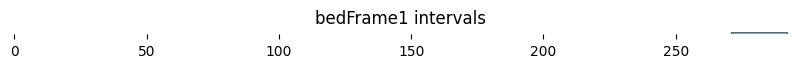

In [ ]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.vis

df1 = pd.DataFrame([
    ['Primer1',271, 292 ]],
    columns=['chrom', 'start', 'end']
)

bf.vis.plot_intervals(df1, show_coords=True,)
plt.title('bedFrame1 intervals');


In [ ]:
df

,Name,Inicio,Fim,Length
0,ORF1a,266,13483,13217
1,ORF1ab,13483,21555,8072
2,SPIKE,21563,25384,3821
3,ORF3a,25393,26220,827
4,ORF4,26245,26472,227
5,ORF 5,26523,27191,668
6,ORF 6,27202,27387,185
7,ORF 7a,27394,27759,365
8,ORF 7b,27756,27887,131
9,ORF 8,27894,28262,368


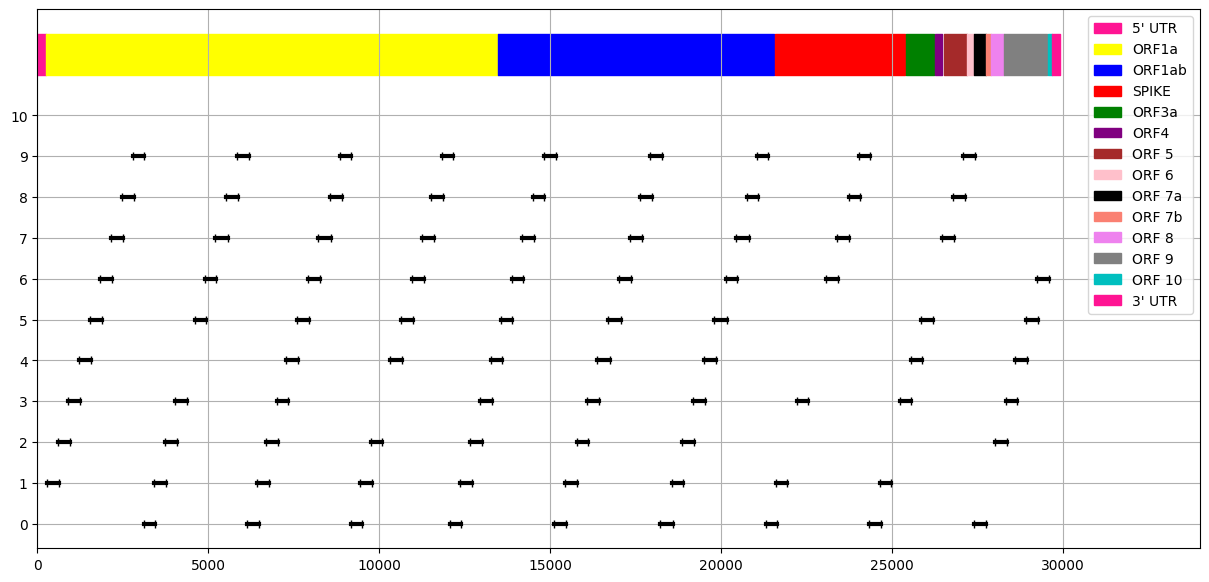

In [ ]:
import random
import matplotlib.pyplot as plt

random.seed(43)

fig, axs = plt.subplots(1, 1, figsize=(15, 7))#, sharey='row')
#for idx, orf in df.iloc[:, :].iterrows():
#  axs[0].broken_barh([(orf['Inicio'], orf['Fim'] - orf['Inicio'])], (0, 1), color=random.choice(list(matplotlib.colors.CSS4_COLORS.values())))
#  ticks = []

idx = 0
g_size = 0
ax = 0
limit=5
legend_color = {'mistyrose': False, 'lavender': False, 'orange': False}
colors = (['yellow', 'blue', 'red', 'green', 'purple', 'brown', 'pink', 'black', 'salmon', 'violet', 'gray', 'c', 'orange', 'deeppink'])
ticks = []
axs.broken_barh([(0, 265)], (11, 1), label="5' UTR", color=colors[-1])
for _l, _r in zip(ls, rs):
  if (_l is not None) and (_r is not None):
    _l = _l[0]
    _r = _r[0]

    #axs.broken_barh([(_l[0], _r[0] - _l[0])], (idx % 10, 0.5))
    axs.plot([_l[0], _r[0]], [idx % 10, idx % 10], marker='|', color='black', linewidth=3)
    ticks.append(idx)
  idx += 1

for idx, row in df.iterrows():
    start = row['Inicio']#((row['Inicio'] - min_pos)/(max_pos - min_pos))*98
    end = row['Fim']#((row['Fim'] - min_pos)/(max_pos - min_pos))*98
    axs.broken_barh([(start, end - start)], (11, 1), color=colors[idx], label=row['Name'])

axs.broken_barh([(29675, 29903 - 29675)], (11, 1), label="3' UTR", color=colors[-1])

axs.set_yticks(range(11))
axs.grid()
ticks.clear()
axs.legend(prop={'size': 10}, loc='upper right')
_ = axs.set_xlim(0, 34_000)
